In [1]:
import sys
sys.path

['D:\\DevRoot\\project\\FG_Vision',
 'C:\\ProgramData\\Anaconda3\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin']

In [250]:
domain = []

In [251]:
import matplotlib.pyplot as plt

In [ ]:
import cv2 
import numpy as np 

class MouseGesture():
    def __init__(self) -> None:
        self.is_dragging = False 
        # 마우스 위치 값 임시 저장을 위한 변수 
        self.x0, self.y0, self.w0, self.h0 = -1,-1,-1,-1

    def on_mouse(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.x0 = x
            self.y0 = y
            self.is_dragging = True
            print("사각형의 시작 좌표는 x : {} y : {}".format(x,y) )
        elif event == cv2.EVENT_LBUTTONUP:
            self.is_dragging = False
            cv2.rectangle(param['image'], (self.x0, self.y0), (x,y),(0,0,255),2)            
            cv2.imshow(param['window_name'], param['image'])
            print("사각형의 좌표는 ({}, {}), ({}, {})".format(self.x0,self.y0,x,y) )
            img_cropped = cv2.getRectSubPix(
                image,
                patchSize=(x - self.x0, y - self.y0),
                center=(((self.x0 + x) / 2), ((self.y0 + y) / 2)),
            )
            plt.imshow(img_cropped)
            domain.append({
                "label": "신청서비스 본인발급시 문자전송여부",
                "w": int(x - self.x0),
                "h": int(y - self.y0),
                "cx": int((self.x0 + x) / 2),
                "cy": int((self.y0 + y) / 2),
            })
            print(domain)
        elif event == cv2.EVENT_MOUSEMOVE:
            if self.is_dragging:
                temp_img = param['image'].copy()
                cv2.rectangle(temp_img, (self.x0, self.y0), (x,y),(0,0,255),4)            
                cv2.imshow(param['window_name'], temp_img)
        return 


image = cv2.imread('./static/img/16.jpg')
image = cv2.resize(image, (2480, 3508))
window_name = 'mouse_callback'
mouse_class = MouseGesture()
param = {
    "image" : image,
    "window_name" : window_name
}

cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name, image)
cv2.resizeWindow(window_name, 1000, 1500)
cv2.setMouseCallback(window_name, mouse_class.on_mouse, param=param)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [259]:
domain.pop(-1)

{'label': '해지 신청서 여부', 'w': 62, 'h': 74, 'cx': 1365, 'cy': 507}

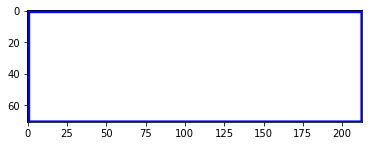

In [211]:
i = -1
img_cropped = cv2.getRectSubPix(
                image,
                patchSize=(domain[i]['w'], domain[i]['h']),
                center=(domain[i]['cx'], domain[i]['cy']),
            )
plt.imshow(img_cropped)

In [154]:
len(domain)

26

In [249]:
domain

[{'label': '제목', 'w': 459, 'h': 82, 'cx': 608, 'cy': 286},
 {'label': '출생자 성명(한글)', 'w': 473, 'h': 139, 'cx': 787, 'cy': 457},
 {'label': '출생자 성명(한자)', 'w': 476, 'h': 136, 'cx': 789, 'cy': 606},
 {'label': '출생자 출생일시', 'w': 813, 'h': 65, 'cx': 957, 'cy': 719},
 {'label': '출생자 출생장소', 'w': 1049, 'h': 68, 'cx': 1543, 'cy': 800},
 {'label': '출생자 부모가 정한 등록기준지', 'w': 1207, 'h': 68, 'cx': 1464, 'cy': 881},
 {'label': '출생자 주소', 'w': 922, 'h': 119, 'cx': 920, 'cy': 988},
 {'label': '출생자 세대주 및 관계', 'w': 365, 'h': 119, 'cx': 1888, 'cy': 988},
 {'label': '출생자 복수국적자일 경우 외국국적', 'w': 590, 'h': 65, 'cx': 1773, 'cy': 1090},
 {'label': '부모 부(성명)', 'w': 209, 'h': 71, 'cx': 602, 'cy': 1175},
 {'label': '부모 부(성명-한자)', 'w': 178, 'h': 68, 'cx': 1379, 'cy': 1174},
 {'label': '부모 부 주민등록번호', 'w': 305, 'h': 71, 'cx': 1918, 'cy': 1175},
 {'label': '부모 모(성명)', 'w': 213, 'h': 71, 'cx': 602, 'cy': 1257},
 {'label': '부모 모(성명-한자)', 'w': 178, 'h': 68, 'cx': 1379, 'cy': 1256},
 {'label': '부모 모 주민등록번호', 'w': 305, 'h': 64,